<h1 align="center">Gas ideal: número de partículas, presión, volumen y temperatura</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

Este *Jupyter Notebook* ha sido creado con el propósito de analizar el número de partículas, presión, volumen y temperatura del gas ideal utilizando el simulador [Propiedades de los Gases de PhET](https://phet.colorado.edu/es/simulation/gas-properties).

## 1. Librerías y métodos 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
def plot_with_error(df, x_label, param_label, instrument_error=0, marker='', color='', label=''):
    x = []
    y_mean = []
    y_std  = []
    for xk, df in df.groupby(x_label):
        x.append(xk)
        y_mean.append(np.mean(df[param_label]))
        y_std.append(max([instrument_error, np.std(df[param_label])]))
    plt.plot(x, y_mean, marker+color, label=label)
    for k in range(len(x)):
        y1 = y_mean[k] - y_std[k]
        y2 = y_mean[k] + y_std[k]
        plt.plot(2*[x[k]], [y1, y2], '+-'+color, alpha=0.8, lw=1, ms=4)
    plt.xlabel(x_label)
    plt.ylabel(param_label)

## 2. Relación entre la presión y el número de partículas
Con el simulador para [Gas Ideal de PhET](https://phet.colorado.edu/sims/html/gas-properties/latest/gas-properties_es.html), recolecte datos y grafique la presión en función del número de partículas sin ninguna ligadura (Mantener Constante: Nada).

### 2.1. Solo partículas pesadas
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [3]:
ancho =  10 # nm
T     = 300 # K
data1_list = [
    ['pesadas', 'Presión [kPa]'],
    [ 50      ,  614],
    [ 50      ,  563],
    [ 50      ,  590],
    [ 50      ,  573],
    [100      , 1196],
    [100      , 1137],
    [100      , 1225],
    [100      , 1204],
    [150      , 1738],
    [150      , 1802],
    [150      , 1817],
    [150      , 1793],
]

In [4]:
data1 = pd.DataFrame(data1_list[1:], columns=data1_list[0])
data1

,pesadas,Presión [kPa]
0,50,614
1,50,563
2,50,590
3,50,573
4,100,1196
5,100,1137
6,100,1225
7,100,1204
8,150,1738
9,150,1802


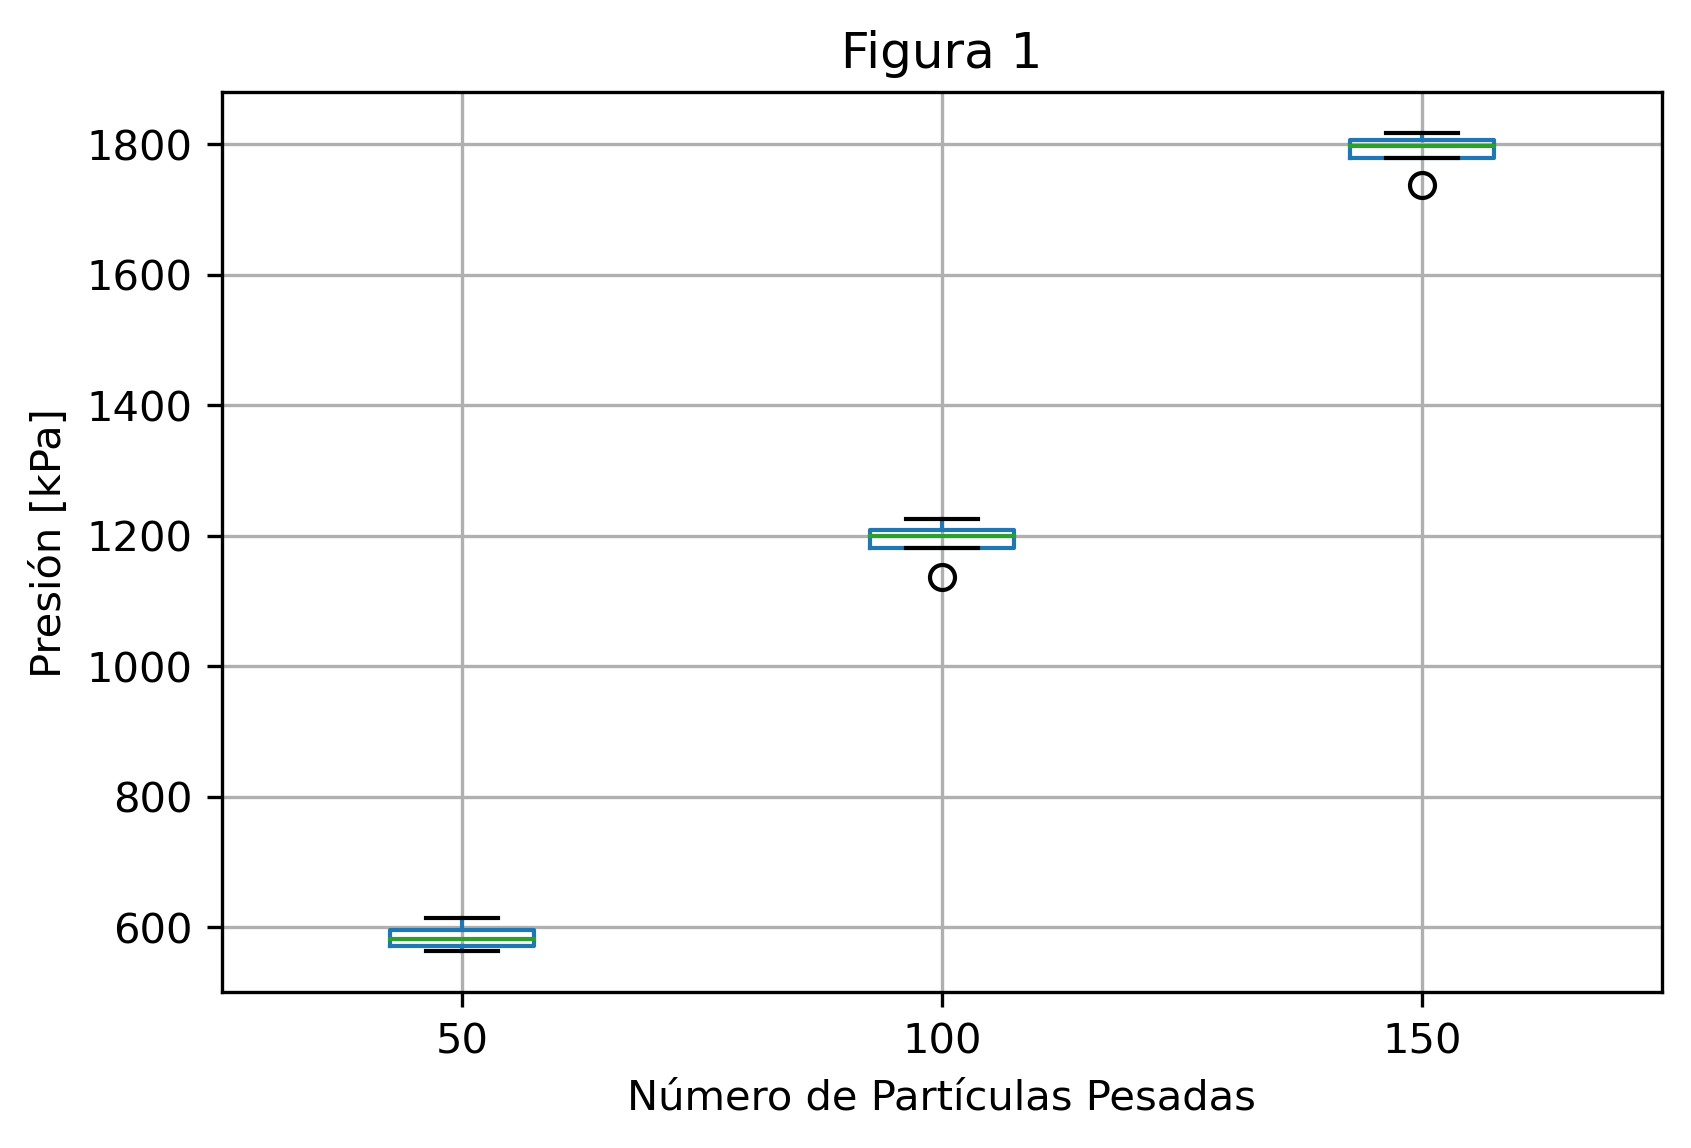

In [5]:
plt.figure(dpi=300)
axes =  data1.boxplot(
    by='pesadas', 
    column='Presión [kPa]',
    ax=plt.gca())
fig = axes.get_figure()
fig.suptitle('')
plt.xlabel('Número de Partículas Pesadas')
plt.ylabel('Presión [kPa]')
_ = plt.title('Figura 1')

### 2.2. Solo partículas ligeras
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [6]:
ancho =  10 # nm
T     = 300 # K
data2_list = [
    ['ligeras', 'Presión [kPa]'],
    [ 50       ,   566],
    [ 50       ,   606],
    [ 50       ,   551],
    [ 50       ,   573],
    [100       ,  1206],
    [100       ,  1224],
    [100       ,  1147],
    [100       ,  1176],
    [150       ,  1767],
    [150       ,  1791],
    [150       ,  1762],
    [150       ,  1813],
]

In [7]:
data2 = pd.DataFrame(data2_list[1:], columns=data2_list[0])

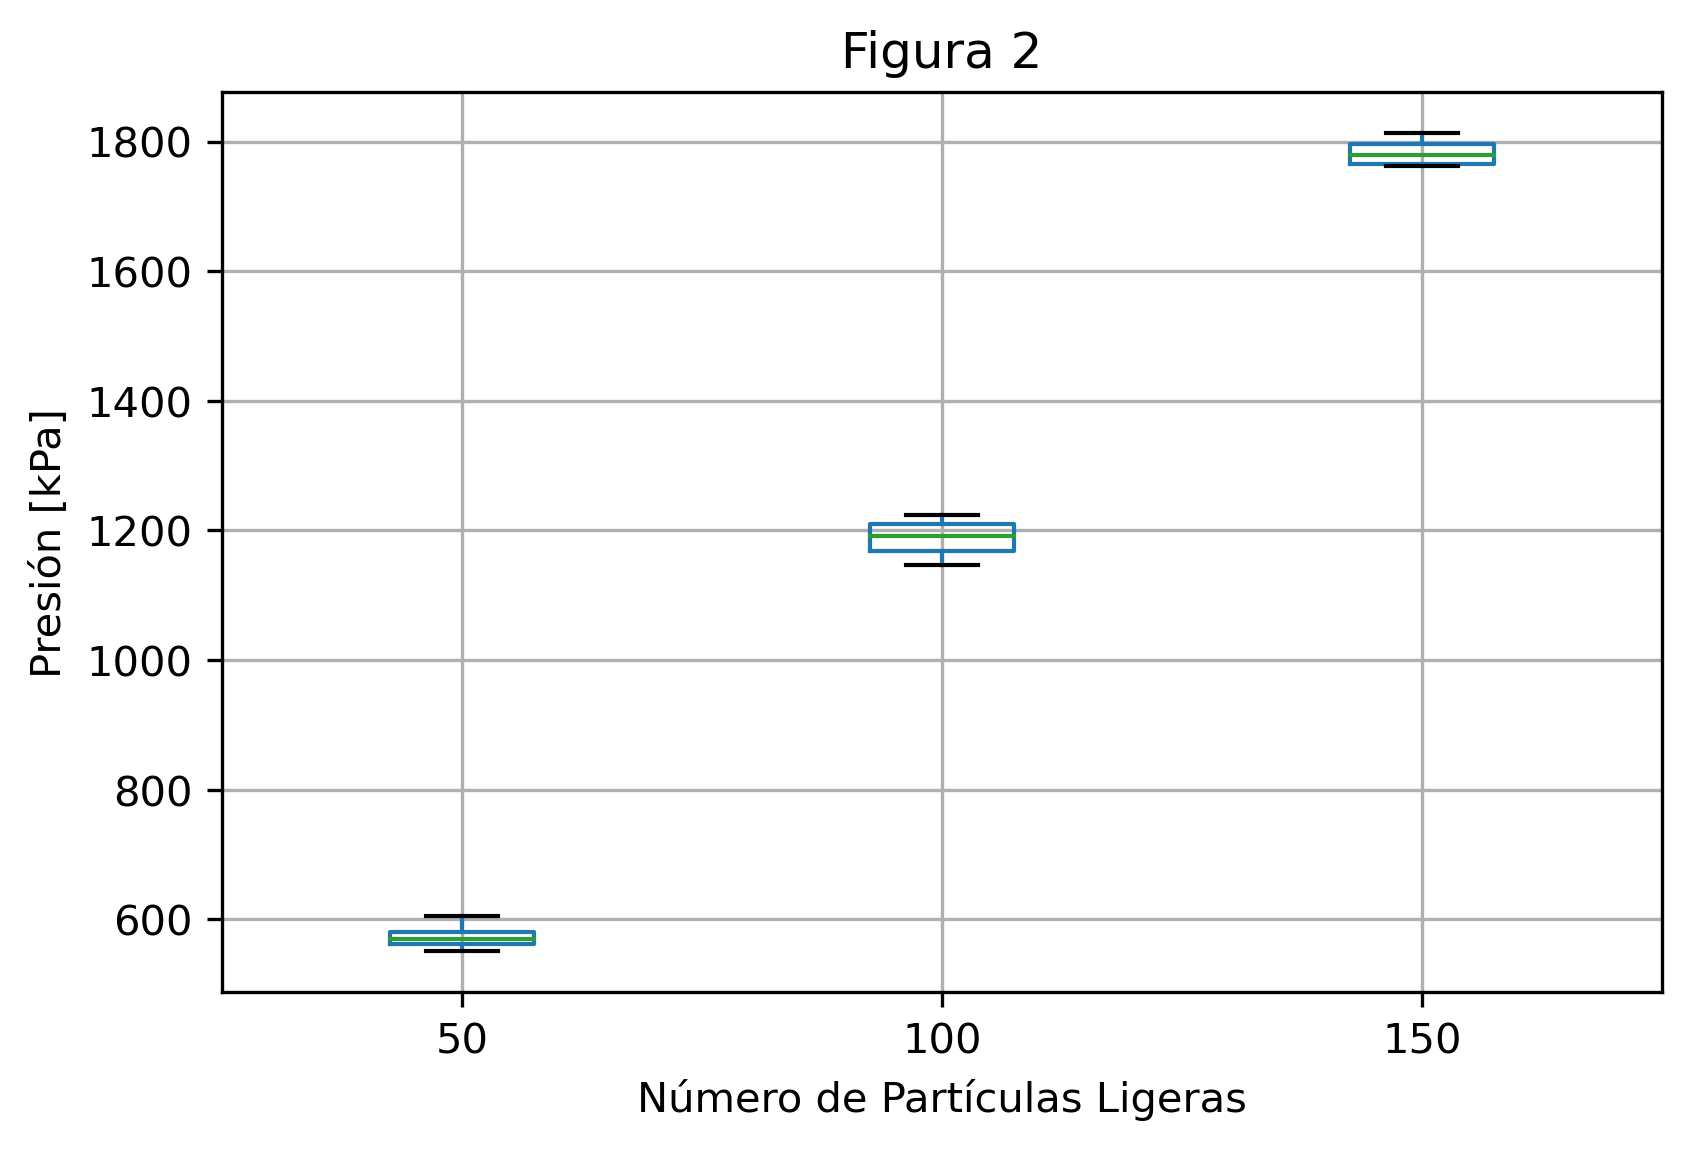

In [8]:
plt.figure(dpi=300)
axes =  data2.boxplot(
    by='ligeras', 
    column='Presión [kPa]',
    ax=plt.gca())
fig = axes.get_figure()
fig.suptitle('')
plt.xlabel('Número de Partículas Ligeras')
plt.ylabel('Presión [kPa]')
_ = plt.title('Figura 2')

### 2.3. Partículas ligeras y pesadas
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [9]:
ancho =  10 # nm
T     = 300 # K
data3_list = [
    ['ligeras', 'pesadas', 'Presión [kPa]'],
    [ 50      ,  0       ,   556],
    [ 50      ,  0       ,   606],
    [ 50      ,  0       ,   551],
    [ 50      ,  0       ,   573],
    [ 50      , 50       ,  1208],
    [ 50      , 50       ,  1152],
    [ 50      , 50       ,  1219],
    [ 50      , 50       ,  1167],
    [100      , 50       ,  2081],
    [100      , 50       ,  2098],
    [100      , 50       ,  2060],
    [100      , 50       ,  2076],
]

In [10]:
data3 = pd.DataFrame(data3_list[1:], columns=data3_list[0])

In [11]:
mean1_list = [['ligeras', 'pesadas', 'Presión media [kPa]']]
for g1, df1 in data3.groupby('ligeras'):
    for g2, df2 in df1.groupby('pesadas'):
        mean1_list.append(
            [g1, g2, np.mean(df2['Presión [kPa]'])]
        )
mean1 = pd.DataFrame(mean1_list[1:], columns=mean1_list[0])
mean1

,ligeras,pesadas,Presión media [kPa]
0,50,0,571.50
1,50,50,1186.50
2,100,50,2078.75


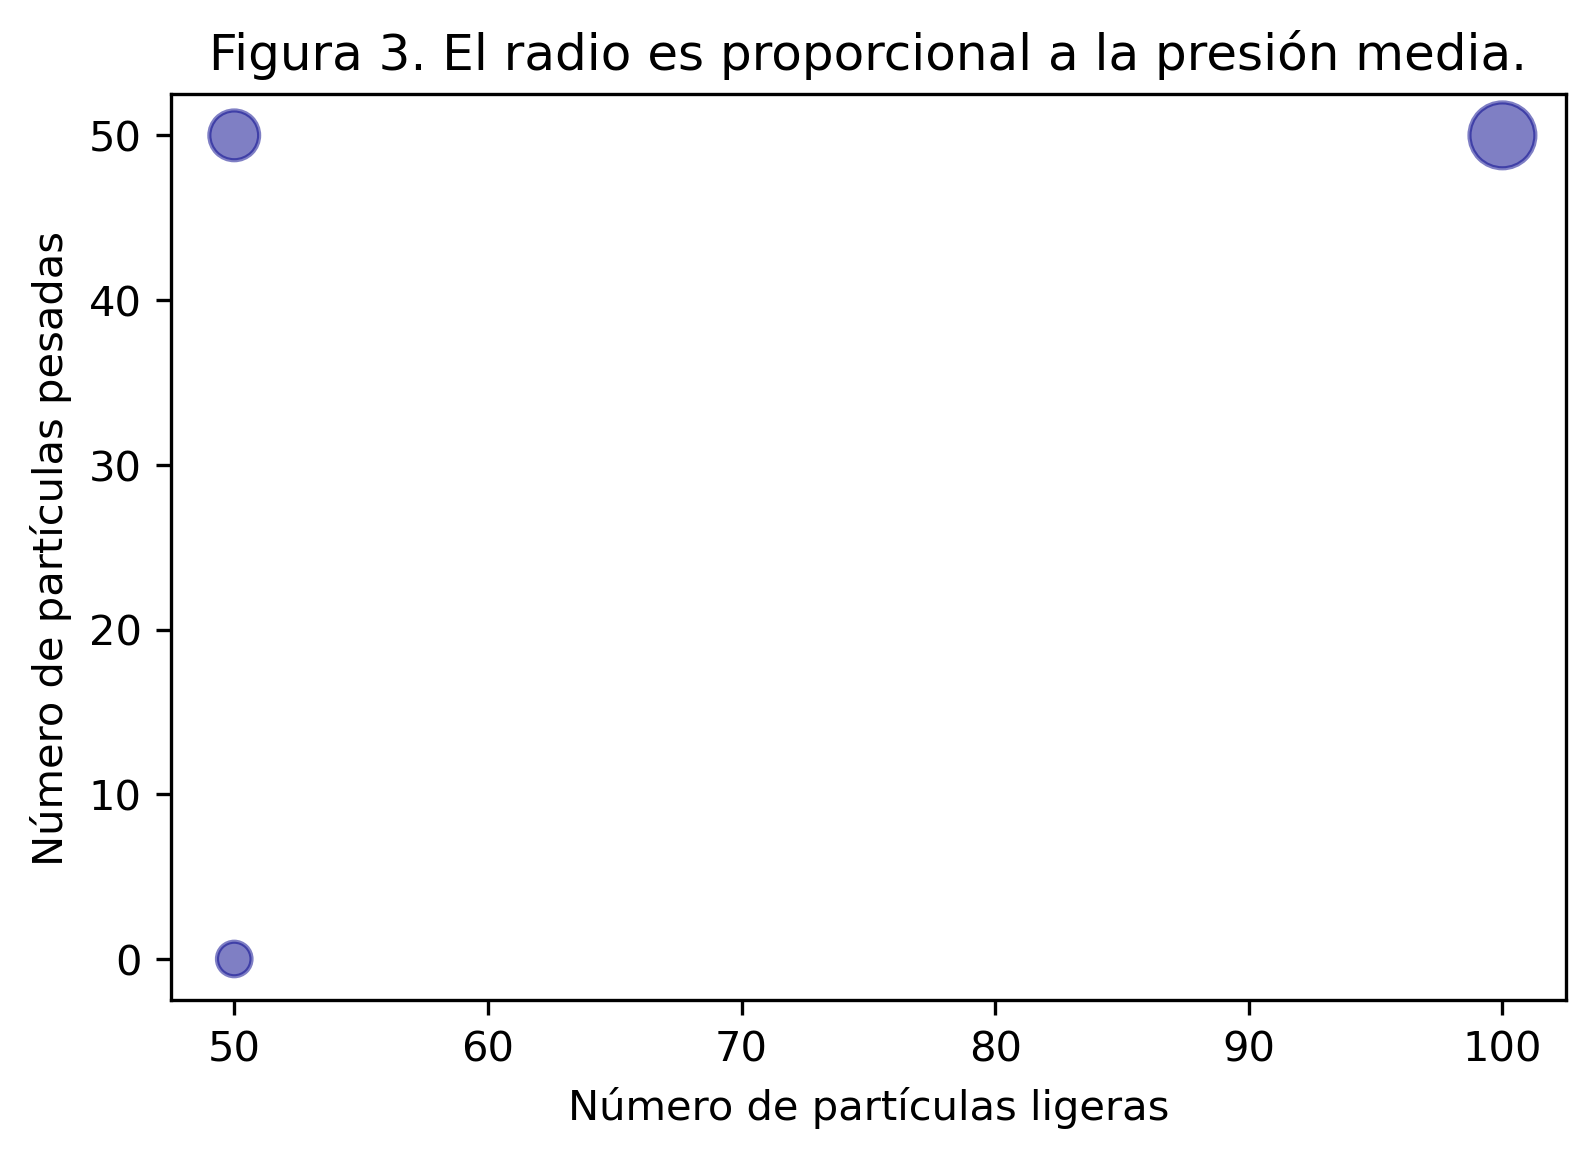

In [12]:
plt.figure(dpi=300)
plt.title('Figura 3. El radio es proporcional a la presión media.')
P = mean1['Presión media [kPa]']
plt.scatter(
    mean1['ligeras'],
    mean1['pesadas'],
    s=250*P/max(P),
    color='darkblue',
    alpha=0.5)
plt.xlabel('Número de partículas ligeras')
_ = plt.ylabel('Número de partículas pesadas')

## 3. Relación entre presión, volumen y temperatura
Para un cierto número de partículas, se analizará la relación entre presión, volumen y temperatura.

### 3.1. Número de partículas y volúmen constante
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [13]:
ligeras =   0
pesadas = 200
ancho   =  10 # nm
temperatura = 300 # K
data4_list = [
    ['Temperatura [K]', 'Presión [kPa]'],
    [ 300             , 2382 ],
    [ 300             , 2389 ],
    [ 300             , 2380 ],
    [ 300             , 2400 ],
    [ 350             , 2800 ],
    [ 350             , 2783 ],
    [ 350             , 2773 ],
    [ 350             , 2721 ],
    [ 430             , 3429 ],
    [ 430             , 3424 ],
    [ 430             , 3417 ],
    [ 430             , 3401 ],
]

In [14]:
data4 = pd.DataFrame(data4_list[1:], columns=data4_list[0])

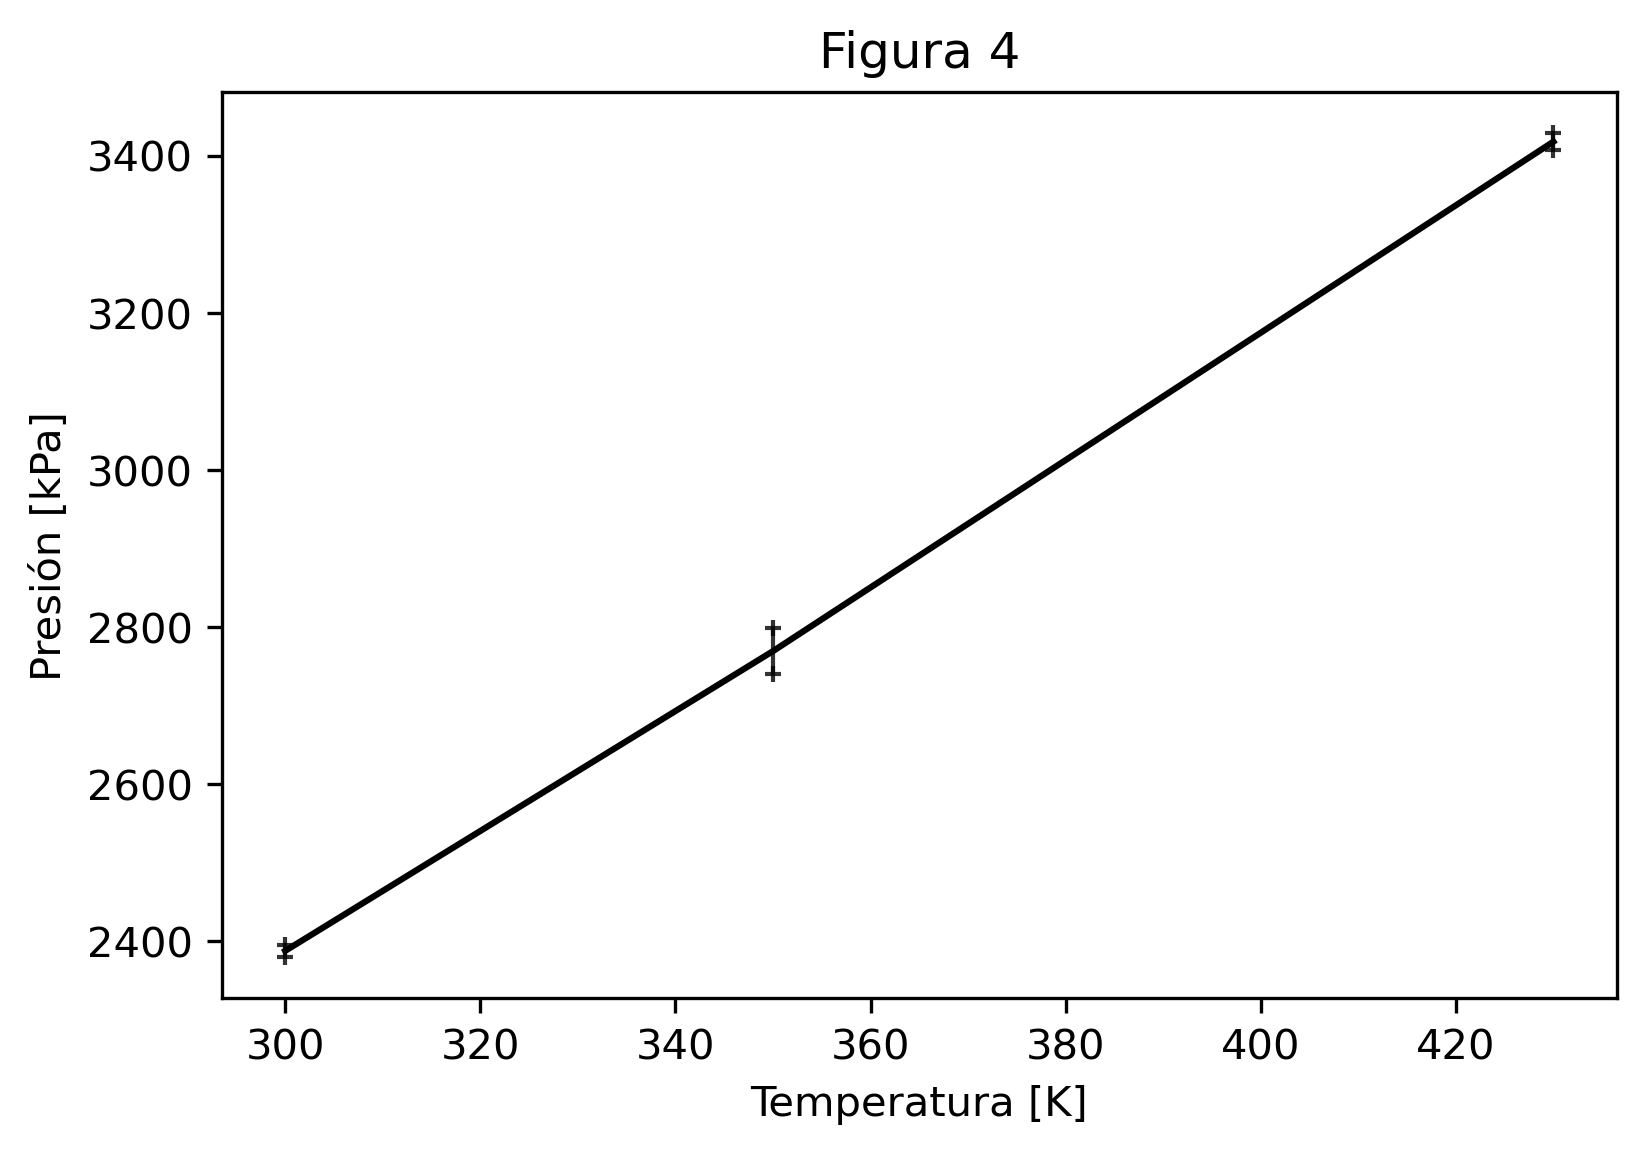

In [15]:
plt.figure(dpi=300)
plt.title('Figura 4')
plot_with_error(
    data4,
    'Temperatura [K]', 
    'Presión [kPa]',
    color='k')

### 3.2. Número de partículas y temperatura constante
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [16]:
ligeras =   0
pesadas = 200
temperatura = 300 # K
data5_list = [
    ['Ancho [nm]', 'Presión [kPa]'],
    [ 10         ,  2342 ],
    [ 10         ,  2401 ],
    [ 10         ,  2394 ],
    [ 10         ,  2358 ],
    [ 11         ,  2145 ],
    [ 11         ,  2145 ],
    [ 11         ,  2189 ],
    [ 11         ,  2141 ],
    [ 12         ,  1993 ],
    [ 12         ,  1996 ],
    [ 12         ,  1959 ],
    [ 12         ,  1953 ],
]

In [17]:
data5 = pd.DataFrame(data5_list[1:], columns=data5_list[0])

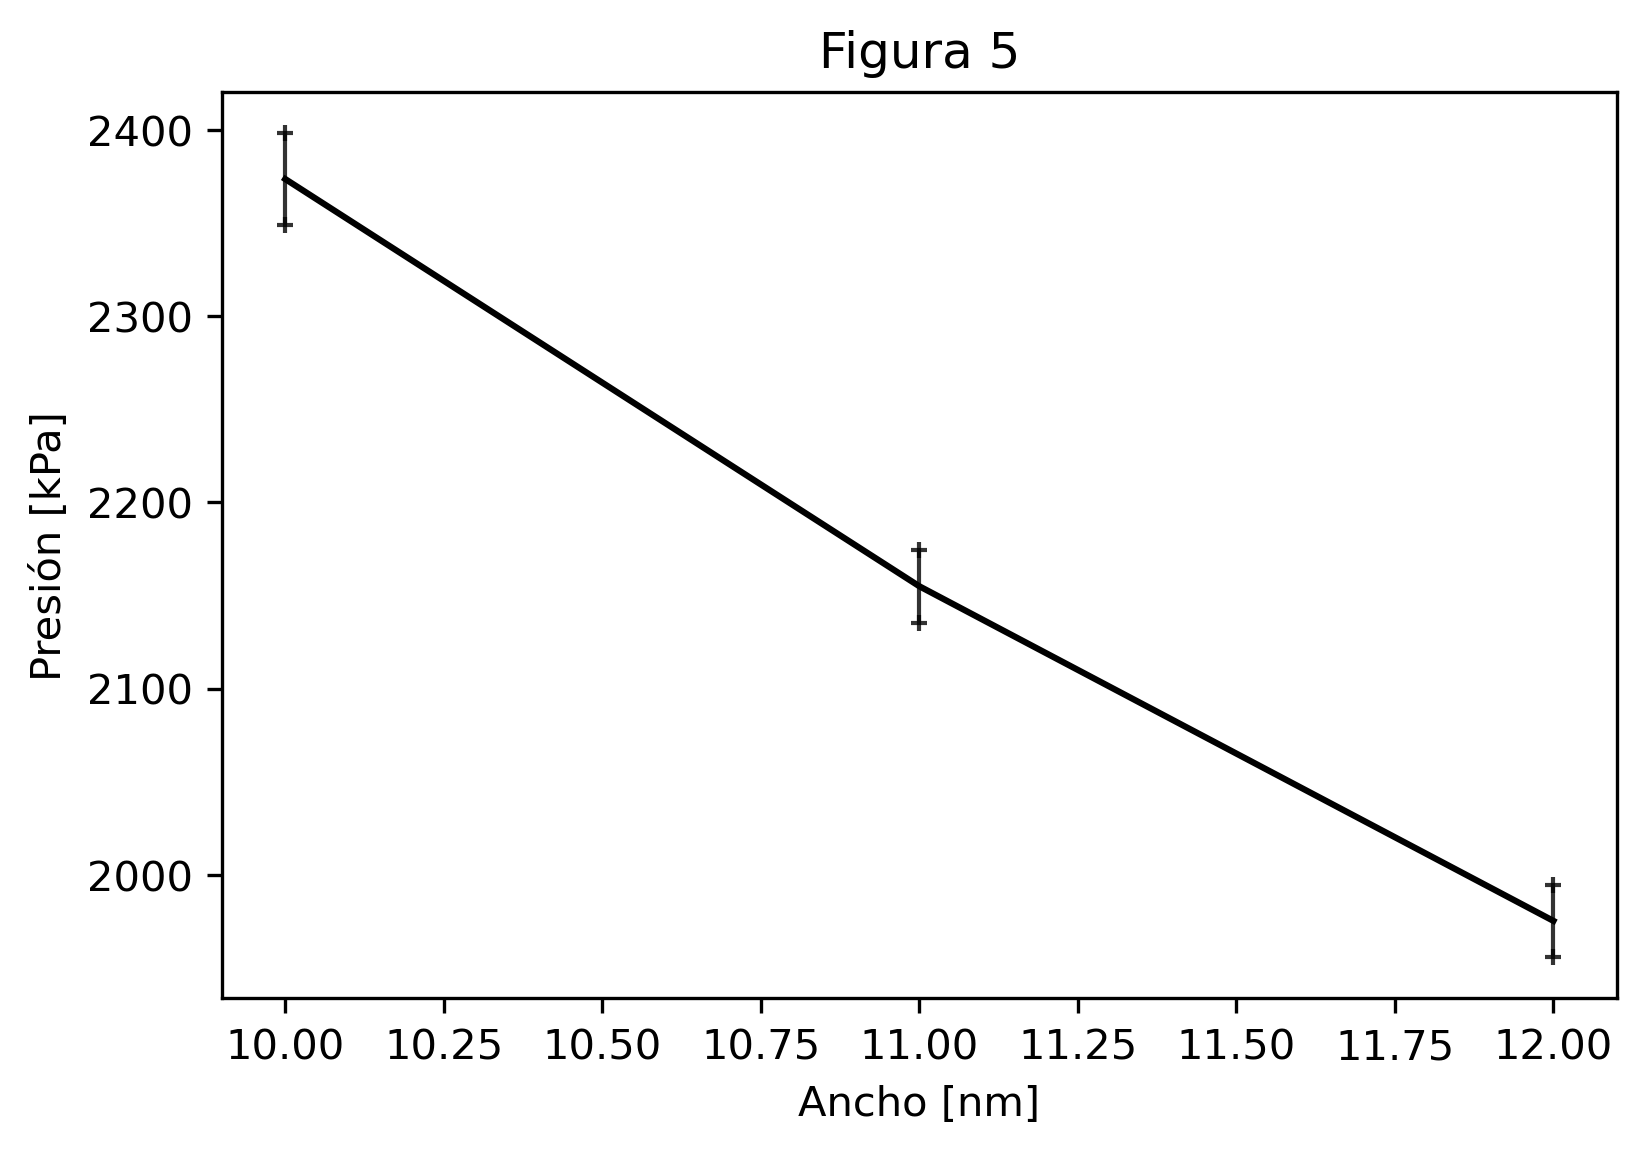

In [18]:
plt.figure(dpi=300)
plt.title('Figura 5')
plot_with_error(
    data5,
    'Ancho [nm]', 
    'Presión [kPa]',
    color='k')

### 3.3. Número de partículas y presión constante
Nota: se muestran solo unos pocos datos, usted debe recolectar muchos más datos para que pueda sacar las conclusiones que se requieren.

In [19]:
ligeras =    0
pesadas =  200
presion = 1775 # kPa
data6_list = [
    ['Ancho [nm]', 'Temperatura [K]'],
    [ 10.0         ,   300 ],
    [  9.6         ,   297 ],
    [  8.3         ,   274 ],
    [  6.5         ,   248 ],
]

In [20]:
data6 = pd.DataFrame(data6_list[1:], columns=data6_list[0])

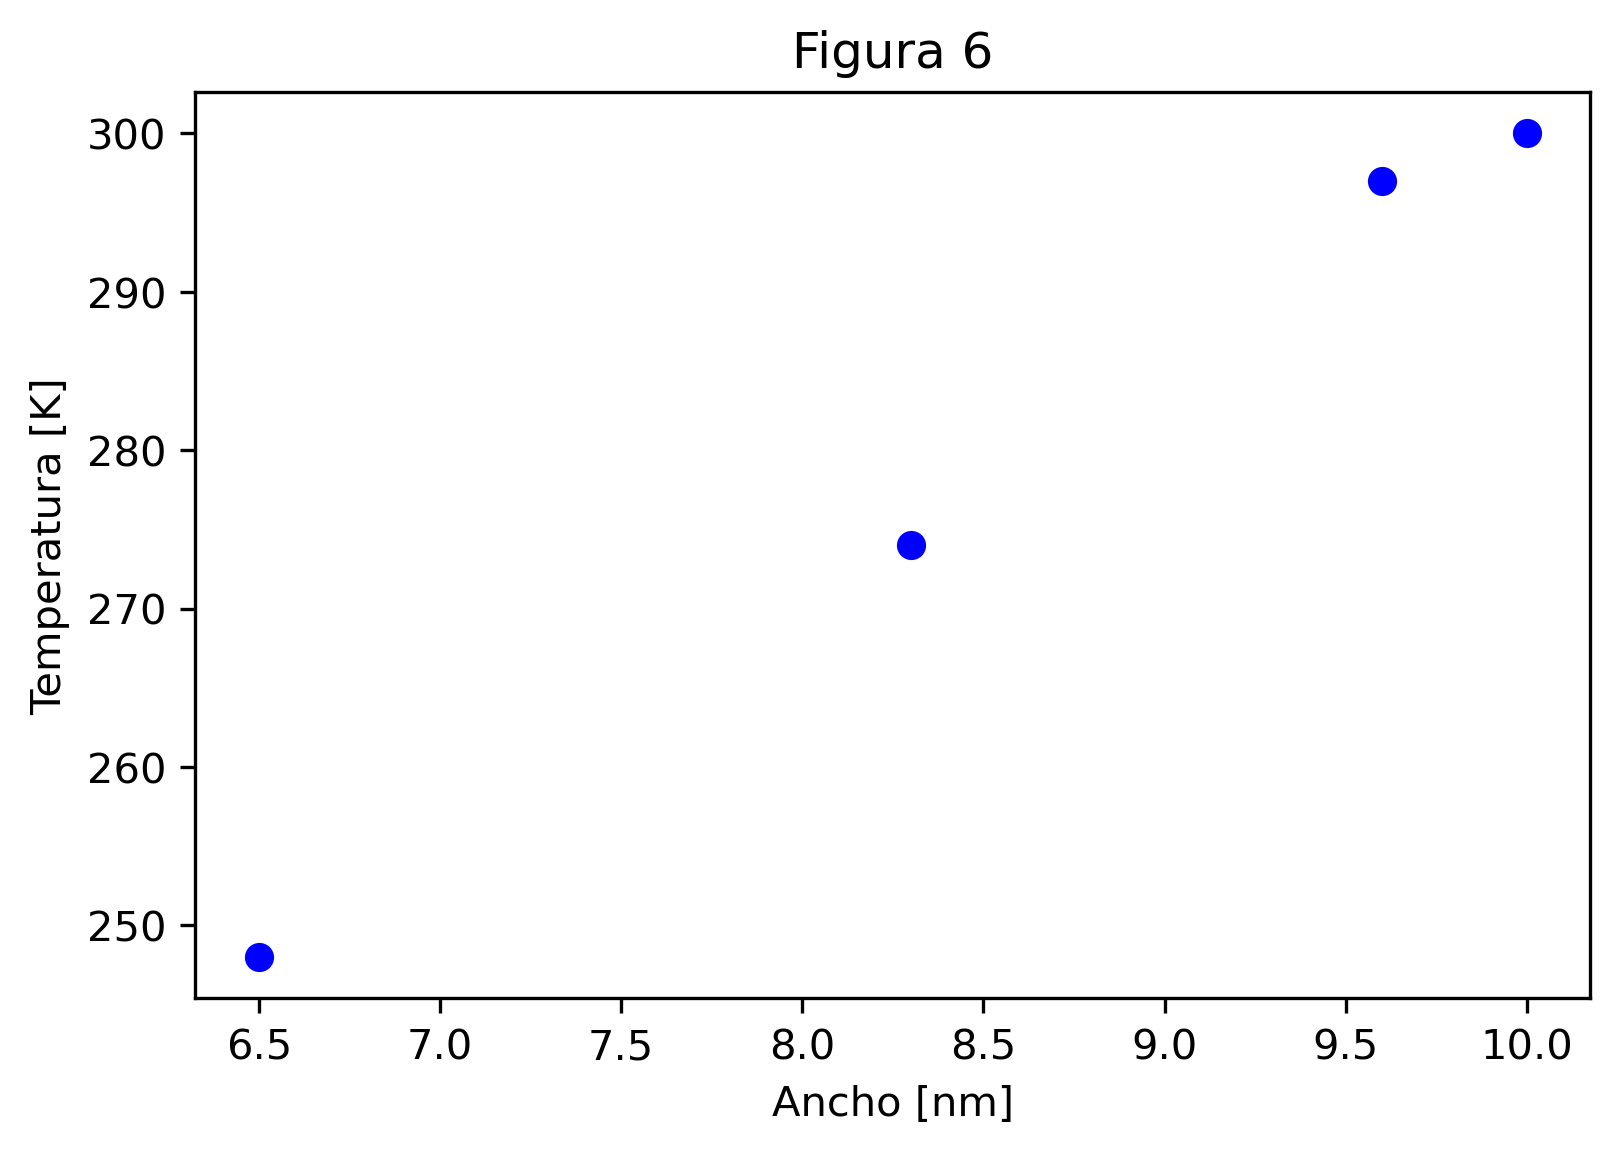

In [21]:
plt.figure(dpi=300)
plt.title('Figura 6')
plot_with_error(
    data6,
    'Ancho [nm]', 
    'Temperatura [K]',
    color='b',
    marker='o')

## 4. Preguntas de autoexplicación

4.1. Las Figuras 1, 2, 4 y 5 muestran barras de errores de medición, ¿cuáles son la similitudes y diferencias en el tipo de figura? ¿Cuál considera más apropiada y por qué la considera más apropiada?

4.2. ¿Cómo se puede variar la presión del sistema? Explique y muestre ejemplos ilustrativos.

4.3. ¿Cómo se puede variar la temperatura del sistema? Explique y muestre ejemplos ilustrativos.

4.4. ¿Cómo se puede variar el volumen del sistema? Explique y muestre ejemplos ilustrativos.

4.5. ¿Cómo se relaciona la presión, volumen y temperatura del gas ideal? Muestre figuras que ilustren sus argumentos.

End!